# Move Points to Grid
Move each point of a PH diagram to the closest point in a grid. This will not use a heat kernel. I will not ignore the empty area of the PDs, and I will only use a rectangular grid.

In [122]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
path = '../../scripts/'
sys.path.insert(0,path)
from RipserToDict import ripser_to_dict
from PlotPersistence import plot_persistence
import pickle
import random

## Parameters

In [123]:
params = {
    'grid_width': 10,
    'grid_height': 10
}

## Functions

In [124]:
def gridify_a_PD(PD,params):
    
    """Moves points to nearest intersection in a grid. Input is a collection of (b,d)-points."""
    
    width = params['grid_width']
    height = params['grid_height']
    max_persistence = params['max_persistence']
    
    out_im = np.zeros((height,width))
    rx = max_persistence/(float)(width - 1)
    ry = max_persistence/(float)(height - 1)
    n_points = PD.shape[0]
    
    for y in range(height):
        for x in range(width):
            for n in range(n_points):
                its_close_to_x = -rx/2. < PD[n,0] - rx*x < rx/2.
                its_close_to_y = -ry/2. < PD[n,1] - ry*y < ry/2.
                if its_close_to_x and its_close_to_y:
                    out_im[y,x] += 1
    out_im = np.flipud(out_im)
    return out_im
    

## Calculations

In [135]:
# load files

# sphere
sphere_seed = 0
with open('../../../heavy_files/exercises/ml_on_1_to_3/sphere_persistences/' + str(sphere_seed) + '.txt', 'rb') as f:
    sphere_dict = pickle.load(f)
PD = sphere_dict[2].copy()
params.update(sphere_dict['params'].copy())
print(params)
#print(PD)

{'threshold': 10, 'all_seeds': range(0, 10), 'shape': 'sphere', 'seed': 0, 'deviation': 0.1, 'n_points': 200, 'grid_width': 10, 'grid_height': 10, 'dim': 2, 'max_persistence': 2.5}


In [136]:
out_im = gridify_a_PD(PD,params)

In [137]:
print(out_im)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


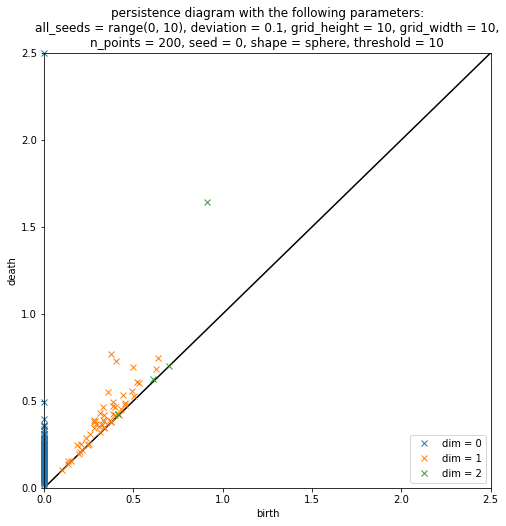

In [138]:
fig = plot_persistence(sphere_dict,params)